# ⭐Imports


In [1]:
from processing_functions import *
%matplotlib inline

TensorFlow Version:  2.1.0


---

# ⭐ Building Classifier

## 🔵 Step 1: Preprocess Data (Create Dataset)

In [23]:
# MAIN
data_s = np.array(pd.read_csv('data_s_csv').iloc[:, 1:])
data_b = np.array(pd.read_csv('data_b_csv').iloc[:, 1:])

# # LOG
# data_s = np.array(pd.read_csv('data_s_log_csv').iloc[:, 1:])
# data_b = np.array(pd.read_csv('data_b_log_csv').iloc[:, 1:])

# # NORMAL
# data_s = np.array(pd.read_csv('data_s_normal_csv').iloc[:, 1:])
# data_b = np.array(pd.read_csv('data_b_normal_csv').iloc[:, 1:])

In [24]:
# Create s&b labels
slabels = np.ones(data_s.shape[0]//40)
blabels = np.zeros(data_b.shape[0]//40)

# Concatenate examples and labels
data = np.concatenate((data_s, data_b), axis=0)
labels = np.concatenate((slabels, blabels), axis=0)

# Define useful quantities
num_of_examples = data.shape[0] // 40     # divide by 40 because 1st dim is 40 * num_of_examples
num_of_labels = labels.shape[0]
print('Total Events:', num_of_examples)
print('Total Labels:', num_of_labels)

# Reshape examples (for sklearn)
examples = data.reshape(num_of_examples, 1600)
print('Shape: ', examples.shape)

Total Events: 29449
Total Labels: 29449
Shape:  (29449, 1600)


In [25]:
from sklearn.model_selection import train_test_split

train_examples, test_examples, train_labels, test_labels = train_test_split(examples, labels, test_size=0.15, random_state=42)
train_examples, val_examples, train_labels, val_labels = train_test_split(train_examples, train_labels, test_size=0.18, random_state=42)

print('Train: ', train_examples.shape, train_labels.shape)
print('Val: ', val_examples.shape, val_labels.shape)
print('Test: ', test_examples.shape, test_labels.shape)

Train:  (20525, 1600) (20525,)
Val:  (4506, 1600) (4506,)
Test:  (4418, 1600) (4418,)


## 🔵 Step 2: Create Models

Define Models

In [26]:
# Ensemble Methods
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  # Decision Trees
from sklearn.naive_bayes import MultinomialNB    # Naive Bayes
from sklearn.naive_bayes import GaussianNB       # Gaussian Naive Bayes
from sklearn.svm import SVC                      # SVM
import random

# Instantiate classes
random.seed(42)
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes = MultinomialNB()
naive_bayes_g = GaussianNB()
bagging = BaggingClassifier(random_state=42, n_jobs=6)
random_forest = RandomForestClassifier(random_state=42, n_jobs=6)
svm = SVC(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)

## 🔵 Step 3: Hyperparameter Tuning (Hardcore)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from time import time




# Naive Bayes
alpha = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Bagging
n_estimators_bagging = [10, 20, 30, 50, 100, 200, 300]
max_samples_bagging = [0.1, 0.2, 0.5, 1.0, 2.0, 3.0, 5.0]
max_features_bagging = [0.5, 1.0, 2.0, 3.0, 50.0, 200]

# Random Forests
criterion = ['gini', 'entropy']
n_estimators_rf = [100, 150, 200]
max_depth_rf = [None, 1, 3, 5, 10]
min_samples_leaf_rf = [5, 10]
min_samples_split_rf = [5, 10]


# SVC
kernel = ['rbf']
c_parameter = [0.0001, 0.001, 0.01, 0.1, 1, 10]
gamma = [0.0001, 0.001, 0.01, 0.1, 1]


# AdaBoost
n_estimators_ada = [10, 30, 50, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]






# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}
naive_bayes_g_parameters = {'var_smoothing': np.logspace(0,-9, num=1000)}
bagging_parameters = {'n_estimators': n_estimators_bagging, 'max_features': max_features_bagging, 'max_samples': max_samples_bagging}
random_forest_parameters = {'n_estimators': n_estimators_rf, 'max_depth': max_depth_rf, 'min_samples_leaf': min_samples_leaf_rf, 'min_samples_split': min_samples_split_rf}
svm_parameters = {'kernel': kernel, 'C': c_parameter, 'gamma': gamma}
adaboost_parameters = {'n_estimators': n_estimators_ada, 'learning_rate': learning_rate}

# Scoring object using accuracy
scorer = make_scorer(accuracy_score)


clfs_param =[(naive_bayes, naive_bayes_parameters), 
             (naive_bayes_g, naive_bayes_g_parameters), 
             (bagging, bagging_parameters), 
             (random_forest, random_forest_parameters), 
             (svm, svm_parameters), 
             (adaboost, adaboost_parameters)]

## 🔵 Step 3: Hyperparameter Tuning (Softcore)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from time import time




# Naive Bayes
alpha = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Bagging
n_estimators_bagging = [10, 50, 100, 300]
max_samples_bagging = [0.1, 1.0, 2.0, 5.0]
max_features_bagging = [0.5, 3.0, 50.0, 200]

# Random Forests
criterion = ['gini', 'entropy']
n_estimators_rf = [100, 150, 200]
max_depth_rf = [None, 1, 3, 5, 10]
min_samples_leaf_rf = [5, 10]
min_samples_split_rf = [5, 10]


# SVC
kernel = ['rbf']
c_parameter = [0.0001, 0.01, 0.1, 1, 10]
gamma = [0.0001, 0.001, 0.01, 0.1, 1]


# AdaBoost
n_estimators_ada = [10, 30, 100, 500]
learning_rate = [0.01, 0.1, 0.5, 1, 2]






# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}
naive_bayes_g_parameters = {'var_smoothing': np.logspace(0,-9, num=300)}
bagging_parameters = {'n_estimators': n_estimators_bagging, 'max_features': max_features_bagging, 'max_samples': max_samples_bagging}
random_forest_parameters = {'n_estimators': n_estimators_rf, 'max_depth': max_depth_rf, 'min_samples_leaf': min_samples_leaf_rf, 'min_samples_split': min_samples_split_rf}
svm_parameters = {'kernel': kernel, 'C': c_parameter, 'gamma': gamma}
adaboost_parameters = {'n_estimators': n_estimators_ada, 'learning_rate': learning_rate}

# Scoring object using accuracy
scorer = make_scorer(accuracy_score)


clfs_param =[(naive_bayes, naive_bayes_parameters), 
             (naive_bayes_g, naive_bayes_g_parameters), 
             (bagging, bagging_parameters), 
             (random_forest, random_forest_parameters), 
             (adaboost, adaboost_parameters)]

In [29]:
# Create list to store models
models = []
unopt_accuracies = []
accuracies = []

# Perform grid search
for clf, parameter in clfs_param:
    print('\n{}\n'.format(clf.__class__.__name__))
    
    grid_obj = GridSearchCV(clf, parameter, scoring=scorer, n_jobs = 6)
    
    # Perform grid search
    start = time()
    grid_fit = grid_obj.fit(train_examples, train_labels)
    end = time()
    print('Time to tune: {}s'.format(round(end - start), 2))
    
    # Get best estimator
    best_clf = grid_fit.best_estimator_
    models.append(best_clf)
    
    # Make predictions using the unoptimized and model
    start = time()
    predictions = (clf.fit(train_examples, train_labels)).predict(val_examples)
    best_predictions = best_clf.predict(val_examples)
    
    predictions_train = (clf.fit(train_examples, train_labels)).predict(train_examples)
    best_predictions_train = best_clf.predict(train_examples)
    end = time()
    print('Time to fit-predict: {}s\n'.format(round(end - start), 2))
    
    # Check hyperparameters
    print('Unoptimised: {}\n'.format(clf.get_params(deep = True)))
    print('Optimised: {}\n'.format(best_clf.get_params(deep = True)))
    
    # Print Results
    print("\nUnoptimised-Accuracy-training: {:.4f}".format(accuracy_score(train_labels, predictions_train)))
    print("Optimised-Accuracy-training: {:.4f}".format(accuracy_score(train_labels, best_predictions_train)))
    
    print("\nUnoptimised-Accuracy-validation: {:.4f}".format(accuracy_score(val_labels, predictions)))
    print("Optimised-Accuracy-validation: {:.4f}".format(accuracy_score(val_labels, best_predictions)))
    
    print('\n \n \n=============================================================================================')
    
    unopt_accuracies.append(accuracy_score(val_labels, predictions))
    accuracies.append(accuracy_score(val_labels, best_predictions))
    
print('All unoptimised accuracies (validation): {}'.format(unopt_accuracies))
print('Best unoptimised accuracy (validation): {}\n'.format(max(unopt_accuracies)))
print('All optimised accuracies (validation): {}'.format(accuracies))
print('Best optimised accuracy (validation): {}'.format(max(accuracies)))


MultinomialNB

Time to tune: 4s
Time to fit-predict: 0s

Unoptimised: {'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

Optimised: {'alpha': 2, 'class_prior': None, 'fit_prior': True}


Unoptimised-Accuracy-training: 0.7205
Optimised-Accuracy-training: 0.7204

Unoptimised-Accuracy-validation: 0.7022
Optimised-Accuracy-validation: 0.7024

 
 

GaussianNB

Time to tune: 435s
Time to fit-predict: 3s

Unoptimised: {'priors': None, 'var_smoothing': 1e-09}

Optimised: {'priors': None, 'var_smoothing': 1.4251026703029963e-05}


Unoptimised-Accuracy-training: 0.4814
Optimised-Accuracy-training: 0.6268

Unoptimised-Accuracy-validation: 0.4423
Optimised-Accuracy-validation: 0.5994

 
 

BaggingClassifier

Time to tune: 4789s
Time to fit-predict: 136s

Unoptimised: {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': 6, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Optim

## 🔵 Step 4: Confusion Matrix

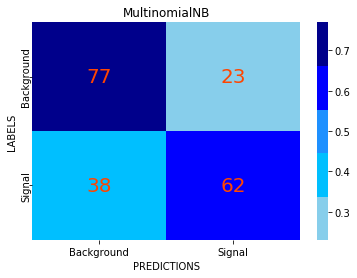

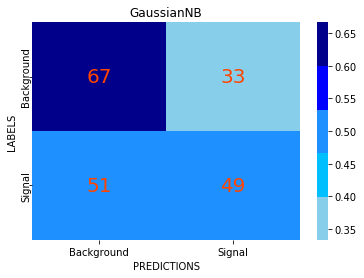

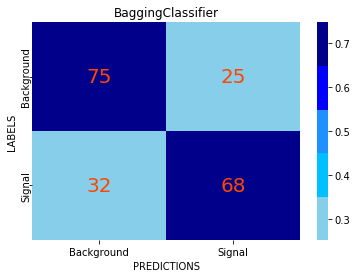

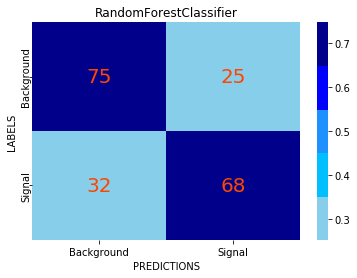

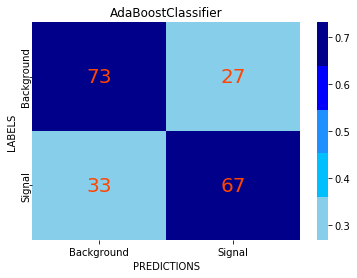

In [30]:
for model in models:
    
    labels = model.predict(test_examples)
    preds = test_labels
    
    cmx_non_normal = tf.math.confusion_matrix(labels, preds).numpy() # Create Confusion Matrix
    cmx0 = cmx_non_normal[0] / cmx_non_normal[0].sum()
    cmx1 = cmx_non_normal[1] / cmx_non_normal[1].sum()
    cmx = np.stack((cmx0, cmx1), axis=0)


    # Plot confusion matrix
    fig, ax = plt.subplots()
    sns.heatmap(cmx, cmap=['skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'darkblue'])

    # xylabels and title
    plt.title(remove_text_inside_brackets(str(model)))
    plt.xlabel('PREDICTIONS')
    plt.ylabel('LABELS')

    # Label ticks
    ax.set_xticklabels(['Background', 'Signal'])
    ax.set_yticklabels(['Background', 'Signal'])
    # Align ticks
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
             rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=90, ha="center",
             rotation_mode="anchor")

    # Text Annotations for Blocks in CMX
    for i in range(2):
        for j in range(2):

            value = int(np.round(100*cmx[i, j], 0))

            text = ax.text(j+0.5, 
                           i+0.5, 
                           value,
                           ha="center", 
                           va="center", 
                           color="orangered", 
                           fontsize = 20)

    plt.show()


    # # Print P(signal|signal) and P(signal|background)
    # pss = cmx[1,1] / (cmx[1,1]+cmx[1,0])
    # pbs = 1 - pss
    # psb = cmx[0,1] / (cmx[0,1]+cmx[0,0])
    # pbb = 1 - psb
    # precision = cmx[1,1] / (cmx[1,1]+cmx[0,1])
    # recall = cmx[1,1] / (cmx[1,1]+cmx[1,0])
    # print('\n')
    # print('P(signal|signal) = {:.0f}%'.format(100*pss))
    # print('P(signal|background) = {:.0f}%'.format(100*psb)) 
    # print('P(background|background) = {:.0f}%'.format(100*pbb))
    # print('P(background|signal) = {:.0f}%'.format(100*pbs))
    # print('Precision = {:.0f}'.format(precision*100))
    # print('Recall = {:.0f}'.format(recall*100))
    # print('\n')


